In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

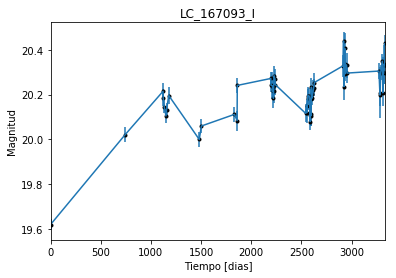

In [5]:
data = np.genfromtxt('LC_167093_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_167093_I')
plt.savefig("LC_167093_I.pdf")

In [6]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [7]:
%%capture capt
sample = model.run_mcmc(20000)

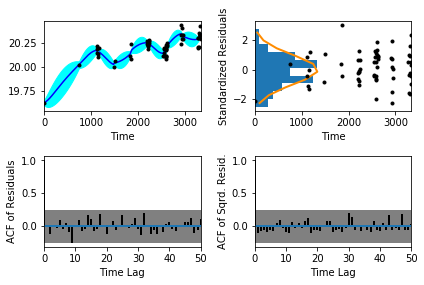

In [8]:
sample.assess_fit()

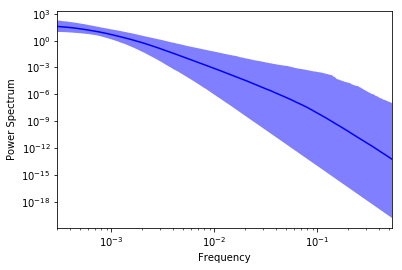

In [9]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [10]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

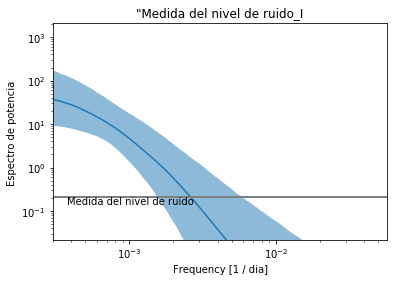

In [11]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_167093_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_167093_I')

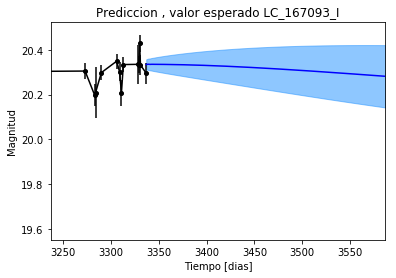

In [12]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_167093_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_167093_I')

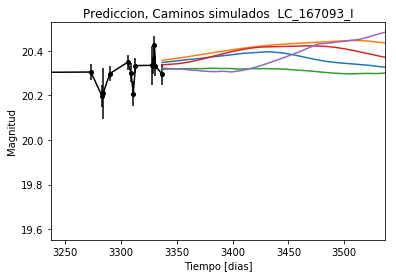

In [13]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_167093_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


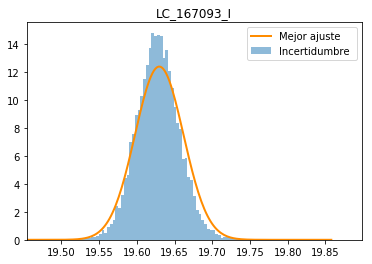

In [14]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_167093_I')
plt.savefig("Mejor_ajuste_LC_167093_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_167093_I')

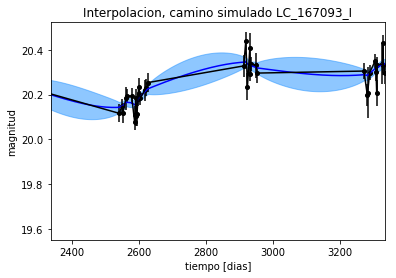

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_167093_I')

Text(0.5,1,'Interpolacion, camino simulado LC_167093_I')

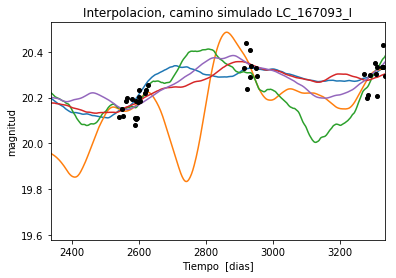

In [16]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_167093_I')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 706.371528371
Median: 0.00810440276007
Standard deviation: 0.203597562456
68% credibility interval: [ 0.00068874  0.18974552]
95% credibility interval: [  3.40997517e-04   8.23364547e-01]
99% credibility interval: [  3.06640922e-04   9.98322557e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 449.46278781
Median: 0.000854887564118
Standard deviation: 0.0707222098369
68% credibility interval: [ 0.00037376  0.01483038]
95% credibility interval: [ 0.00030993  0.20199783]
99% credibility interval: [  3.01956996e-04   5.16488365e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 784.4382119
Median: 0.016191799802
Standard de

In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 801.656485829
Median: 107.659455238
Standard deviation: 1.52580050274
68% credibility interval: [ 105.86828237  108.74411145]
95% credibility interval: [ 103.59399146  109.2800754 ]
99% credibility interval: [ 101.63648382  109.50883994]


In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 363.625697273
Median: 0.660131958812
Standard deviation: 2.2504928573
68% credibility interval: [ 0.04120152  4.11033762]
95% credibility interval: [ 0.01210927  7.36042815]
99% credibility interval: [  9.07033867e-03   1.03705909e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 781.439254324
Median: 0.186868802344
Standard deviation: 7.84753815769
68% credibility interval: [  5.13944067e-03   6.01900309e+00]
95% credibility interva

In [21]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0382656
Median: 2.39672496766e-40
Standard deviation: 1.95311738163e+79
68% credibility interval: [  1.89493289e-78   5.13003444e-11]
95% credibility interval: [  2.04727049e-133   6.03976252e+001]
99% credibility interval: [  4.09035591e-153   1.19678738e+026]


In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2263.68568771
Median: 20.0895571902
Standard deviation: 0.145781645489
68% credibility interval: [ 19.96130973  20.21192848]
95% credibility interval: [ 19.78580914  20.3677463 ]
99% credibility interval: [ 19.62047456  20.56042972]


In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 580.136967414
Median: 0.000325016627079
Standard deviation: 0.218727904918
68% credibility interval: [ 0.          0.19362094]
95% credibility interval: [ 0.          0.81829958]
99% credibility interval: [ 0.         1.0285936]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 580.136967414
Median: 0.000325016627079
Standard deviation: 0.218727904918
68% credibility interval: [ 0.          0.19362094]
95% credibility interval: [ 0.          0.81829958]
99% credibility interval: [ 0.         1.0285936]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 945.720547087
Median: 0.0
Standard deviation: 0.000239572610621
68% cr

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 801.656485829
Median: 107.659455238
Standard deviation: 1.52580050274
68% credibility interval: [ 105.86828237  108.74411145]
95% credibility interval: [ 103.59399146  109.2800754 ]
99% credibility interval: [ 101.63648382  109.50883994]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1709.55349938
Median: 0.0610850361676
Standard deviation: 0.0738462415678
68% credibility interval: [ 0.03416492  0.12084928]
95% credibility interval: [ 0.02150285  0.25861291]
99% credibility interval: [ 0.01716671  0.51150858]


In [26]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1554.7875637
Median: 1.20386743306
Standard deviation: 0.181470783753
68% credibility interval: [ 1.03758007  1.39374948]
95% credibility interval: [ 0.90333548  1.61464833]
99% credibility interval: [ 0.81712859  1.77644387]


In [27]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 700.703367153
Median: 2.75298370918e-05
Standard deviation: 0.0666275631411
68% credibility interval: [  4.14445051e-07   1.68059380e-03]
95% credibility interval: [  5.59773438e-09   3.45328394e-02]
99% credibility interval: [  7.77620944e-30   3.33319642e-01]


In [28]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 706.371528371
Median: (-0.0509214643455-2.49832925057j)
Standard deviation: 1.87754638976
68% credibility interval: [-1.19220627+0.j         -0.00432747-0.73814737j]
95% credibility interval: [ -5.17335203e+00+0.j          -2.14255059e-03-0.00392871j]
99% credibility interval: [ -6.27264562e+00+0.j          -1.92668173e-03-0.00144984j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 449.46278781
Median: (-0.00537141698215+0.00438033042136j)
Standard deviation: 1.44436104924
68% credibility interval: [-0.09318203+0.16141008j -0.00234843+0.00061647j]
95% credibility interval: [-1.26918977+0.40384499j -0.00194732+0.00561165j]
99% credibility interval: [ -3.24519211e+00+2.93968113j  -1.89725176e-03+0.j        ]
Posterior s